<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP0/TP0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matemáticas para Ciencias de los Datos:
# Trabajo práctico 0

- Professor: M.Sc.Saul Calderon.

- Students: 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- May 15th, 2019   

# 1) Sistemas lineales (20 puntos)
Scaling 
$$
 L\{\alpha f(x)\}= \alpha L\{f(x)\}
$$
Superposition
$$
 L\{f_1(x)+f_2(x)\}= L\{f_1(x)\}+L\{f_2(x)\}
$$

An operator $L\{\cdot\}$ with input functions $f$ with input variable $x \in \mathbb{R}$, with $\alpha, \beta \in \mathbb{R}$, define  a lineal system if:

$$
 L\{\alpha f_1(x)+\beta f_2(x)\}= \alpha L\{f_1(x)\}+\beta L\{f_2(x)\}
$$

# Exercise 1.1

In [0]:
# Libraries required for the exercises
import torch as torch
from torch.autograd import Variable

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [0]:
# Operators definition. 

def linealFunction(x, h):
  """
  Sample lineal function
  param x: input array
  return y: x + 2
  """
  y = x + 2
  return y;


def multiplication(x, h):
  """
  Sample multiplication function
  param x: input arrays
  param h: any function
  return y: x * h
  """
  y = x * h

  return y;


def max(x, h):
  """
  Sample max function
  param x: input arrays
  return y: max(x)
  """
  y = torch.max(x)

  return y;


def differentiation(x, h):
  """
  OJOJOJOJOJOJO Aun no esta bien! Hay que investigar cómo calcular la derivada.  
  Sample differentiation function
  param x: input arrays  
  return h: grad(x)
  """
  y = x.cos()
  y.backward()
  h=x.grad
  return h;



def abs(x, h):
  """
  Sample absolute value function
  param x: input arrays
  return y: abs(x)
  """
  y = torch.abs(x)

  return y;


In [0]:
# Verification of operators linearity.

def checkLinearity(operator, exerc):
  
  # Create series of random values for exerc 1.1 and 1.2
  if exerc == 1:
    # Vector definition for exerc 1.1
     x = torch.randn(50)
  
     if operator == 'differentiation':
        x = torch.randn(1, requires_grad=True) 
  elif exerc == 2:
     # Matrix definition for exerc 1.2
     x = torch.randn(50, 50)

  
  #sample scalars
  alpha = torch.randn(1,1)
  beta = torch.randn(1,1)
  
  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x
  h  = lambda x: x + 3
  
  #compute left and right side of the equation
  right = alpha * operator(f1(x), h(x)) + beta * operator(f2(x), h(x))
  left = operator(alpha * f1(x) + beta * f2(x), h(x))
  
  difference = torch.abs(right - left)
  
  
  sumDifference = difference.sum()
  #Is linear?
  return (sumDifference < 0.0001)
  

In [0]:
## Test exercise 1.1

print("a) g (t) = u(t) + 2 ", checkLinearity(linealFunction, 1))

print("b) g (t) = u(t) h(t) ", checkLinearity(multiplication, 1))

print("c) g (t) = máx (u(t)) ", checkLinearity(max, 1))

# print("d) g (t) = u' 0 (t) ", checkLinearity(differentiation, 1))  Aun no funciona.

print("e) g (t) = |u(t)| ", checkLinearity(abs, 1))


a) g (t) = u(t) + 2  tensor(0, dtype=torch.uint8)
b) g (t) = u(t) h(t)  tensor(1, dtype=torch.uint8)
c) g (t) = máx (u(t))  tensor(0, dtype=torch.uint8)
e) g (t) = |u(t)|  tensor(0, dtype=torch.uint8)


# Exercise 1.2.

In [0]:
# Operators definition. 

def normL1(x, h):
  """
  Sample l1-norm function
  param x: input array
  return y: l1-norm of x
  """
  y = torch.norm(x, p=1, dim=None)
  return y

def normL2(x, h):
  """
  Sample l2-norm function
  param x: input array
  return y: l2-norm of x
  """
  y = torch.norm(x, p=2, dim=None)
  return y

def max(x, h):
  """
  Sample infinite-norm function
  param x: input array
  return y: the maximun absolute value of x
  """
  y = torch.max(x.abs())
  return y

def multivariableFunction(x, h):
  """
  Sample multivariable function
  param x: input arrays
  param h: any function
  NOTE: b = 2
  return y: x * h + b
  """
  y = x * h + 2

  return y;

In [0]:
## Tests exercise 1.2

print("a) Norma de Manhattan L1: ", checkLinearity(normL1, 2))
print("b) Norma Euclidiana L2: ", checkLinearity(normL2, 2))
print("c) Norma L∞: ", checkLinearity(max, 2))
print("d) Multivariable Function: ", checkLinearity(multivariableFunction, 2))



a) Norma de Manhattan L1:  tensor(0, dtype=torch.uint8)
b) Norma Euclidiana L2:  tensor(0, dtype=torch.uint8)
c) Norma L∞:  tensor(0, dtype=torch.uint8)
d) Multivariable Function:  tensor(0, dtype=torch.uint8)


# Vectores (20 puntos)
a) Usando Python (quiver3) grafique los siguientes vectores 

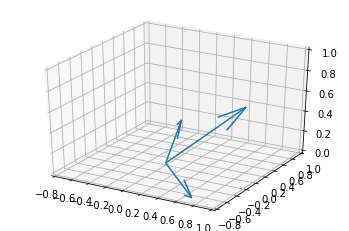

In [3]:
## Tests exercise 2.1.a

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(-0.8, 1)
ax.set_ylim3d(-0.8, 1)
ax.set_zlim3d(0, 1)

# Set vector1, vector2 and vector3
vector1 = ax.quiver(0, 0, 0, -0.3, 0.8, 0.1, length = 1, normalize = True)
vector2 = ax.quiver(0, 0, 0, 0.5, 0.2, 0.4, length = 1, normalize = True)
vector3 = ax.quiver(0, 0, 0, 1/np.sqrt(2), -1/np.sqrt(2), 0, length = 1, normalize = True)

# Plot the three vectors
plt.show()

In [24]:
## Tests exercise 2.1.d

def calculateDotProduct(w, v):
  """
  Calculates the dot product between two vectors
  param w, vector1
  param v, vector2
  return dot product
  """
  vectorProduct = w * v
  return vectorProduct.sum()

def calculateEuclideanNorm(u, v):
  """
  Calculates the euclidean norm between two vectors
  param u, vector1
  param v, vector2
  return norm of a vector
  """
  vectorDifference = u -v
  vectorPow = torch.pow(vectorDifference, 2)
  summatory = vectorPow.sum()
  return torch.sqrt(summatory)

def calculateManhattanNorm(u, v):
  """
  Calculates the Manhattan norm between two vectors
  param u, vector1
  param v, vector2
  return norm of a vector
  """
  return torch.sum(torch.abs(u-v))

def calculateInfiniteNorm(u, v):
  """
  Calculates the Infinite norm between two vectors
  param u, vector1
  param v, vector2
  return norm of a vector
  """
  return torch.max(torch.abs(u-v))

def calculateAngleVectors(w, v):
  """
  Calculates the angle between two vectors
  param w, vector1
  param v, vector2
  return angle in radians
  """
  dotProd = calculateDotProduct(w, v);
  
  #L2 norm (P=2), along first dimension
  angleRadians = torch.acos(dotProd / (w.norm() * v.norm()));
  angleDegrees = (angleRadians / torch.tensor(np.pi)) * 180;
  
  return angleDegrees

## Calculate angle between vectors
## Tests exercise 2.1.d
vector1 = [-0.3, 0.8, 0.1]
vector1 = torch.tensor(vector1)
vector2 = [0.5, 0.2, 0.4]
vector2 = torch.tensor(vector2)
vector3 = [1/np.sqrt(2), -1/np.sqrt(2), 0.]
vector3 = torch.tensor(vector3)
print("a) Angulo en grados entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateAngleVectors(vector1, vector2)))
print("b) Angulo en grados entre v2=%s y v3=%s: %s" % (vector2, vector3, calculateAngleVectors(vector2, vector3)))
print("c) Angulo en grados entre v1=%s y v3=%s: %s\n" % (vector1, vector3, calculateAngleVectors(vector1, vector3)))


## Tests exercise 2.1.e
print("Distancia Euclideana entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateEuclideanNorm(vector1, vector2)))
print("Distancia Euclideana usando torch.norm entre v1=%s y v2=%s: %s" % (vector1, vector2, torch.norm(vector1 - vector2, p=2, dim=None)))
print("Distancia Manhattan entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateManhattanNorm(vector1, vector2)))
print("Distancia Manhattan usando torch.norm entre v1=%s y v2=%s: %s" % (vector1, vector2, torch.norm(vector1 - vector2, p=1, dim=None)))
print("Distancia Infinita entre v1=%s y v2=%s: %s\n" % (vector1, vector2, calculateInfiniteNorm(vector1, vector2)))

print("Distancia Euclideana entre v2=%s y v3=%s: %s" % (vector2, vector3, calculateEuclideanNorm(vector2, vector3)))
print("Distancia Euclideana usando torch.norm entre v2=%s y v3=%s: %s" % (vector2, vector3, torch.norm(vector2 - vector3, p=2, dim=None)))
print("Distancia Manhattan entre v2=%s y v3=%s: %s" % (vector2, vector3, calculateManhattanNorm(vector2, vector3)))
print("Distancia Manhattan usando torch.norm entre v2=%s y v3=%s: %s" % (vector2, vector3, torch.norm(vector2 - vector3, p=1, dim=None)))
print("Distancia Infinita entre v2=%s y v3=%s: %s\n" % (vector2, vector3, calculateInfiniteNorm(vector2, vector3)))

print("Distancia Euclideana entre v1=%s y v3=%s: %s" % (vector1, vector3, calculateEuclideanNorm(vector1, vector3)))
print("Distancia Euclideana usando torch.norm entre v1=%s y v3=%s: %s" % (vector1, vector3, torch.norm(vector1 - vector3, p=2, dim=None)))
print("Distancia Manhattan entre v1=%s y v3=%s: %s" % (vector1, vector3, calculateManhattanNorm(vector1, vector3)))
print("Distancia Manhattan usando torch.norm entre v1=%s y v3=%s: %s" % (vector1, vector3, torch.norm(vector1 - vector3, p=1, dim=None)))
print("Distancia Infinita entre v1=%s y v3=%s: %s\n" % (vector1, vector3, calculateInfiniteNorm(vector1, vector3)))



a) Angulo en grados entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(85.0293)
b) Angulo en grados entre v2=tensor([0.5000, 0.2000, 0.4000]) y v3=tensor([ 0.7071, -0.7071,  0.0000]): tensor(71.5650)
c) Angulo en grados entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v3=tensor([ 0.7071, -0.7071,  0.0000]): tensor(154.7150)

Distancia Euclideana entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(1.0440)
Distancia Euclideana usando torch.norm entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(1.0440)
Distancia Manhattan entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(1.7000)
Distancia Manhattan usando torch.norm entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(1.7000)
Distancia Infinita entre v1=tensor([-0.3000,  0.8000,  0.1000]) y v2=tensor([0.5000, 0.2000, 0.4000]): tensor(0.8000)

Di

In [26]:
# Test Exercise 2.2

def checkConmutativity(u, v):
  """
  Checks the conmutativity property of dot prdouct
  param u, vector1
  param v, vector2
  return true if conmutativity
  """
  
  #compute left and right side of the equation
  right = v * u
  left  = u * v
  
  difference = torch.abs(right.sum() - left.sum());
  sumDifference = difference.sum()
  
  #Is Conmutativity?
  return (sumDifference == 0)

def checkAssociativity(u, v, w):
  """
  Checks the associativity property
  param u, vector1
  param v, vector2
  param w, vector3
  return true if associativity
  """
  
  #compute left and right side of the equation
  right = (u * v).sum()
  right = right * w
  left  = (v * w).sum()
  left  = u * left
  
  difference = torch.abs(right.sum() - left.sum());
  sumDifference = difference.sum()
  
  #Is Associativity?
  return (sumDifference == 0)

## Tests exercise 2.2.a
vector1 = torch.randn(50, 50)
vector2 = torch.randn(50, 50)
vector3 = torch.randn(50, 50)
print("Conmutativity: ", checkConmutativity(vector1, vector2))
print("Associativity: ", checkAssociativity(vector1, vector2, vector3))

Conmutativity:  tensor(1, dtype=torch.uint8)
Associativity:  tensor(0, dtype=torch.uint8)


# La distancia de Minkowski como índice de error(30 puntos)
a) Use como apoyo el cálculo en Pytorch del MAE y el RMSE de los datos
pendientes (?) en la tabla 1.

In [0]:
## Tests exercise 3

def calculateMAE(u, v):
  """
  Calculates the Mean Absolute Error (MAE)
  param u, vector with measured value
  param v, vector with real value
  return MAE
  """
  criterion = torch.nn.L1Loss()
  return criterion(vector1, vector2)

def calculateRMSE(u, v):
  """
  Calculates the Root mean squared error (RMSE)
  param u, vector with measured value
  param v, vector with real value
  return RMSE
  """
  criterion = torch.nn.MSELoss()
  return torch.sqrt(criterion(vector1, vector2))

## Calculate MAE for First Set of Data
vector1 = [4.0,6.0,5.0,6.0,8.0,10.0,7.0,4.0,2.0,8.0]
vector1 = torch.tensor(vector1)

vector2 = [2.0,4.0,3.0,4.0,6.0,8.0,5.0,2.0,4.0,10.0]
vector2 = torch.tensor(vector2)

vector3 = [2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0]
vector3 = torch.tensor(vector3)
standardDeviationMAE = torch.std(vector3)

vector4 = [4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0]
vector4 = torch.tensor(vector4)
standardDeviationRMSE = torch.std(vector4)

print("a) MAE del primer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateMAE(vector1, vector2)))
print("b) RMSE del primer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateRMSE(vector1, vector2)))
print("c) Desviacion estandar del MAE del primer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, standardDeviationMAE))
print("d) Desviacion estandar del RMSE del primer set de datos entre v1=%s y v2=%s: %s\n" % (vector1, vector2, standardDeviationRMSE))

## Calculate MAE for Second Set of Data
vector1 = [5.0,3.0,2.0,4.0,20.0,32.0,5.0,4.0,7.0,41.0]
vector1 = torch.tensor(vector1)

vector2 = [4.0,2.0,3.0,5.0,21.0,29.0,2.0,7.0,4.0,38.0]
vector2 = torch.tensor(vector2)

vector3 = [1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0]
vector3 = torch.tensor(vector3)
standardDeviationMAE = torch.std(vector3)

vector4 = [1.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,9.0,9.0]
vector4 = torch.tensor(vector4)
standardDeviationRMSE = torch.std(vector4)

print("a) MAE del segundo set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateMAE(vector1, vector2)))
print("b) RMSE del segundo set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateRMSE(vector1, vector2)))
print("c) Desviacion estandar del MAE del segundo set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, standardDeviationMAE))
print("d) Desviacion estandar del RMSE del segundo set de datos entre v1=%s y v2=%s: %s\n" % (vector1, vector2, standardDeviationRMSE))


## Calculate MAE for Third Set of Data
vector1 = [6.0,20.0,31.0,41.0,50.0,62.0,73.0,4.0,7.0,40.0]
vector1 = torch.tensor(vector1)

vector2 = [6.0,20.0,31.0,41.0,50.0,62.0,73.0,4.0,7.0,20.0]
vector2 = torch.tensor(vector2)

vector3 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0]
vector3 = torch.tensor(vector3)
standardDeviationMAE = torch.std(vector3)

vector4 = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0]
vector4 = torch.tensor(vector4)
standardDeviationRMSE = torch.std(vector4)

print("a) MAE del tercer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateMAE(vector1, vector2)))
print("b) RMSE del tercer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, calculateRMSE(vector1, vector2)))
print("c) Desviacion estandar del MAE del tercer set de datos entre v1=%s y v2=%s: %s" % (vector1, vector2, standardDeviationMAE))
print("d) Desviacion estandar del RMSE del tercer set de datos entre v1=%s y v2=%s: %s\n" % (vector1, vector2, standardDeviationRMSE))




# Funciones multivariable(30 puntos)
a) Grafique ambos planos en Pytorch.

Text(0.5, 0, 'z')

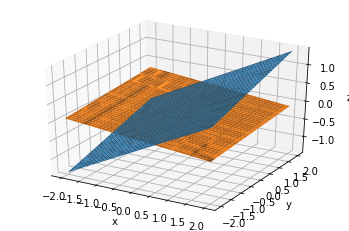

In [43]:
# Test exercise 4.1
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.linspace(-2, 2, 41)
y = np.linspace(-2, 2, 41)
X, Y = np.meshgrid(x, y)

Z = 0.5*X + 0.2*Y
Z1 = -0.1*X + 0.05*Y

fig = plt.figure()
ax  = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')




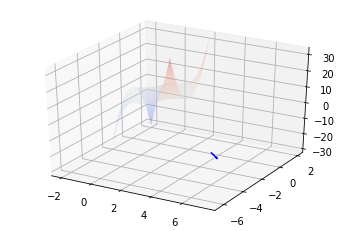

In [48]:
# Test exercise 4.2

#4.1.a
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def f_a(x,y):
  return ((np.power(x, 3))*(np.power(y, 2))) + 1

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f_a(X,Y)

fig = plt.figure()
ax  = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.3)

p0 = [0, 0]
p1 = [7.4, -6.3]
p0G = [0, 0]
p1G = [0.787329, -0.616533]

ax.quiver(p0[0], p0[1], 0, p0G[0], p0G[1], 0, color='red')
ax.quiver(p1[0], p1[1], 0, p1G[0], p1G[1], 0, color='blue')

plt.show()

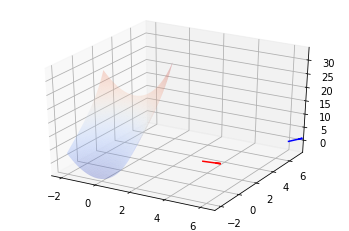

In [49]:
#4.1.b
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def f_b(x,y):
  return (np.power(2.71828, x))+(np.power(2.71828, y)) + 2*(np.power(x, 2)) + 4*(np.power(y, 1)) + 3

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f_b(X,Y)

fig = plt.figure()
ax  = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.3)

p0 = [3.8, 1.8]
p1 = [6.2, 7]
p0G = [0.986170, 0.165459]
p1G = [0.425532, 0.904944]

ax.quiver(p0[0], p0[1], 0, p0G[0], p0G[1], 0, color='red')
ax.quiver(p1[0], p1[1], 0, p1G[0], p1G[1], 0, color='blue')

plt.show()

In [0]:
#4.1.c
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def f_c(x,y):
  return np.log(np.power(x, 2) + np.power(y, 2))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = f_c(X,Y)

fig = plt.figure()
ax  = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.3)

p0 = [-2.4, 6.7]
p1 = [0, 4.3]
p0G = [-0.333333, -0,962962]
p1G = [0, 1]

ax.quiver(p0[0], p0[1], 0, p0G[0], p0G[1], 0, color='red')
ax.quiver(p1[0], p1[1], 0, p1G[0], p1G[1], 0, color='blue')

plt.show()